In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pyformulas as pf
import time
import seaborn as sns

from numpy.linalg import norm
from math import pi
from math import sqrt

In [252]:
L = 1
M = 5
N = 1000
d = 2
colors = sns.color_palette('rocket', n_colors= M+1)

In [253]:
sample = np.random.uniform(-1,1,N*d).reshape((N,d))
norm_sample = norm(sample, axis = 1)

sample = sample[norm_sample < L]
norm_sample = norm_sample[norm_sample < L]

4*len(sample)/N

3.152

In [254]:
stripe_radius = [(i*L/(M)) for i in range(0,M+1)]
stripe_cond = [norm_sample < stripe_radius[i] for i in range(0,M+1)]
stripe_points = [sample[ (stripe_cond[i+1] * (1-stripe_cond[i])).astype(bool) ] for i in range (M)]
for i in range(M):
    angles = np.arctan2(stripe_points[i][:,0],stripe_points[i][:,1])*180/pi
    stripe_points[i] = stripe_points[i][angles.argsort()]

In [255]:
print([len(stripe_points[i]) for i in range(M)])

[44, 89, 142, 209, 304]


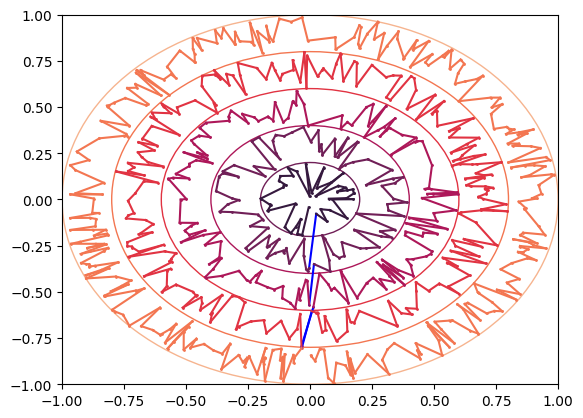

In [256]:
fig, ax = plt.subplots()
for i in range(M,0, -1):
    circle = plt.Circle((0,0), stripe_radius[i], color = colors[i], fill = False)
    ax.add_patch(circle)
for i in range(M):
    plt.scatter(x = stripe_points[i][:,0], y = stripe_points[i][:,1], color = colors[i], s = 1)
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)

num_points = [len(stripe_points[i]) for i in range(M)]
for i in range(M):
    if i < M-1:
        x = (stripe_points[i][num_points[i]-1,0], stripe_points[i+1][0,0])
        y = (stripe_points[i][num_points[i]-1,1], stripe_points[i+1][0,1])
        plt.plot(x,y, color = 'blue')
    for j in range(num_points[i]-1):
        x = (stripe_points[i][j,0], stripe_points[i][j+1,0])
        y = (stripe_points[i][j,1], stripe_points[i][j+1,1])
        plt.plot(x,y, color = colors[i])